In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import astropy.units as u
import astropy.coordinates as coord

In [ ]:
###   using data frames to handle csv files   ###   using rows in data frame that have a parallax greater than 1 mas   ###
df = pd.read_csv('GaiaSource_6714230465835878784_6917528443525529728.csv',nrows=30,usecols=['source_id','ra','dec','parallax','pmra',
                                                                                           'pmdec','radial_velocity'])
nearby = df[df['parallax'] >= 1]

In [4]:
###   putting each data frame column into a list   ###
ra = np.array(nearby['ra'])
dec = np.array(nearby['dec'])
parallax = np.array(nearby['parallax'])
pmra = np.array(nearby['pmra'])
pmdec = np.array(nearby['pmdec'])
d = 1/parallax
rad_vel = np.array(nearby['radial_velocity'])

In [5]:
###   coordinate system relative to sun   ###
c1 = coord.ICRS(ra = ra*u.mas, 
                dec = dec*u.mas, 
                distance = d*u.kpc,
                pm_ra_cosdec = pmra*u.mas/u.yr,
                pm_dec = pmdec*u.mas/u.yr,
                radial_velocity = rad_vel*u.km/u.s)

In [6]:
###   transforming to galactocentric coordinates   ###
gc_frame = coord.Galactocentric(galcen_distance = 8.122*u.kpc)
gc1 = c1.transform_to(gc_frame)

In [7]:
###   putting data into a data frame for visual analysis. uncomment last line to view   ###
gc1_data = {'x':gc1.x,'y':gc1.y,'z':gc1.z,'v_x':gc1.v_x,'v_y':gc1.v_y,'v_z':gc1.v_z,
           'r':np.sqrt(gc1.x**2+gc1.y**2), 'v_xy':np.sqrt(gc1.v_x**2+gc1.v_y**2), 'v_tot': np.sqrt(gc1.v_x**2+gc1.v_y**2+gc1.v_z**2)}
gcdf = pd.DataFrame(gc1_data)
#gcdf

In [20]:
###   positions in 2D plane (polar)   ###
x = np.array(gcdf['x'])
y = np.array(gcdf['y'])
r = np.array(gcdf['r'])
###   velocity in 2D plane   ###
v_x = np.array(gcdf['v_x'])
v_y = np.array(gcdf['v_y'])
vxy = np.array(gcdf['v_xy'])
###   Finding the rotational velocity component (v component perpendicular to radius) from 2D velocity   ###
theta = np.arctan(v_y/v_x)
phi = np.arctan(y/x)
beta = theta - phi
v_az = vxy*np.sin(beta)

In [21]:
###   finding projection of sun velocity on tangential velocity   ###


In [22]:
###   using data frame to sort rows by value of radius from low to high   ###
vr = {'r':r,'v':v_az}
vrdf = pd.DataFrame(vr).sort_values('r')

In [23]:
###   group determines the number of stars that get averaged together.  stars are ordered by distance and grouped   ###
###   averages groups in the array and adds each averaged value to a list   ###
group = 5000
avg_r = [x.mean() for x in np.array_split(np.array(vrdf['r']),len(r)/group)]
avg_v = [x.mean() for x in np.array_split(np.array(abs(vrdf['v'])),len(r)/group)]

Text(0.5,0,'Radius from Galactic Center (kpc)')

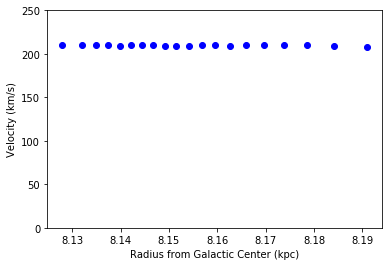

In [24]:
###   Plotting average azimuthal velocity per average radius   ###
plt.plot(avg_r,avg_v,'bo')
plt.ylim(0,250)
plt.ylabel('Velocity (km/s)')
plt.xlabel('Radius from Galactic Center (kpc)')

In [25]:
####   mu is proper motion of star --> converted to transverse velocity, v_abs is absolute velocity   ###
mu = np.sqrt(pmra**2 + pmdec**2)
vt = 4.74*mu*d
v_abs = np.sqrt(vt**2 + rad_vel**2)

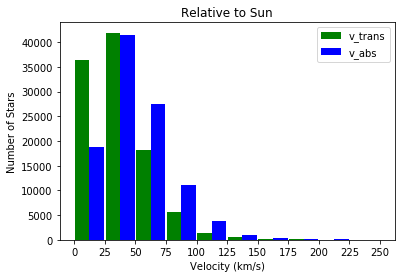

In [26]:
###  proper motion (transverse)   -------   absolute velocity  ###
xdom = range(0,251,25)
plt.hist([vt,v_abs], bins = xdom, rwidth = .95, color = ['green','blue'], label = ['v_trans','v_abs'])
plt.xticks(xdom)
plt.ylabel('Number of Stars')
plt.xlabel('Velocity (km/s)')
plt.title('Relative to Sun')
plt.legend()

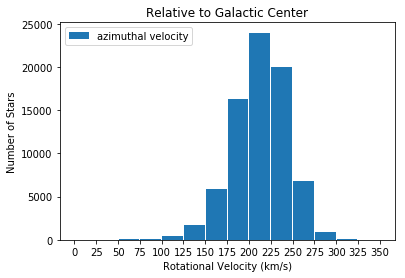

In [27]:
###   Plotting azimuthal velocity of stars   ###
xdom = range(0,351,25)
plt.hist(v_az, bins = xdom, rwidth = .95, label = ['azimuthal velocity'])
plt.xticks(xdom)
plt.ylabel('Number of Stars')
plt.xlabel('Rotational Velocity (km/s)')
plt.title('Relative to Galactic Center')
plt.legend()

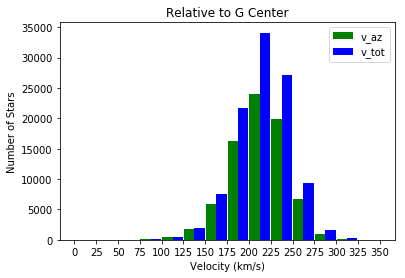

In [28]:
xdom = range(0,351,25)
plt.hist([v_az,np.array(gcdf['v_tot'])], bins = xdom, rwidth = .95, color = ['green','blue'], label = ['v_az','v_tot'])
plt.xticks(xdom)
plt.ylabel('Number of Stars')
plt.xlabel('Velocity (km/s)')
plt.title('Relative to G Center')
plt.legend()

In [19]:

### contour plot of star location (density of stars)
### transformation to find u,v,w vector to perform projection
### thinking about errorbars and standard deviation

In [31]:
A = np.array([[2,3],[1,1]])
B = np.array([[3,1],[1,2]])
C = [[1,5,3],[4,2,2]]

In [32]:
np.matmul(A,B)

array([[9, 8],
       [4, 3]])

In [41]:
gctheta = 122.932
decn = 27.1283
alphan = 192.8595
t_1 = np.array(   [[np.cos(gctheta), np.sin(gctheta), 0] , [np.sin(gctheta),-np.cos(gctheta),0] , [0,0,1]]   )
t_2 = np.array(   [[-np.sin(decn), 0, np.cos(decn)], [0,1,0] , [np.cos(decn),0,np.sin(decn)]]   )
t_3 = np.array(   [[np.cos(alphan), np.sin(alphan), 0], [-np.sin(alphan),np.cos(alphan),0],[0,0,1]]   )
t_12 = np.matmul(t_1,t_2)
TT = np.matmul(t_12,t_3)

In [ ]:
c = 4.74047
vg_list = []
for i in ra:
    for j in dec:
        for k in d:
            for l in pmra:
                for m in pmdec:
                    a_1 = np.array(   [[np.cos(i), -np.sin(i), 0], [np.sin(i), np.cos(i), 0] , [0,0,1]]   )
                    a_2 = np.array(   [[np.cos(j), 0, -np.sin(j)], [0,1,0], [np.sin(j),0,np.cos(j)]]   )
                    AA = np.matmul(a_1,a_2)
                    KK = np.matmul(TT,AA)
                    V_E = np.array(   [[0],[c*k*l],[c*k*m]]   )
                    V_G = np.matmul(KK,V_E)
                    vg_list.append(V_G)

In [ ]:
vg_list